In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## `1` Quantitative vs Quantitative variable

## Scatterplots
If we want to inspect the relationship between **`two numeric variables`**, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's scatter function:

In [6]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')
#print(fuel_econ.info())
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


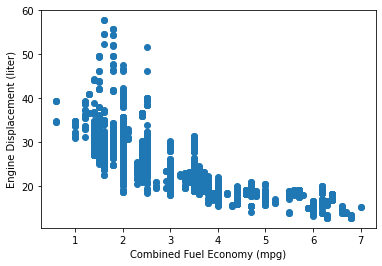

In [9]:
# displ vs comb in scatterplot (matplotlib)
plt.scatter(data=fuel_econ, x='displ', y='comb');

plt.xlabel('Combined Fuel Economy (mpg)')
plt.ylabel('Engine Displacement (liter)');

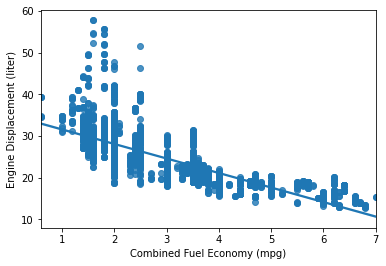

In [15]:
# displ vs comb in regplot (seaborn)
ax = sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=True)
ax.set(xlabel='Combined Fuel Economy (mpg)', ylabel='Engine Displacement (liter)');
#plt.xlabel('Combined Fuel Economy (mpg)')
#plt.ylabel('Engine Displacement (liter)');

By default, the regression function is linear, and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a 
$log(y) ∝ x$
relationship (that is, linear increases in the value of x are associated with linear increases in the log of y), plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set fit_reg = False in the regplot function call. Otherwise, if we want to plot the regression line on the observed relationship in the data, we need to transform the data, as seen in the previous lesson.

In [16]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

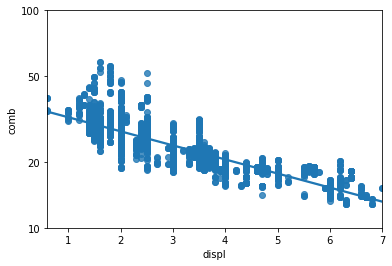

In [18]:
sns.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10,20,50,100]
plt.yticks(log_trans(tick_locs), tick_locs);

### `Tips` Overploting, Transparency and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, **where the high amount of overlap in points** makes it **difficult to see the actual relationship** between the plotted variables.

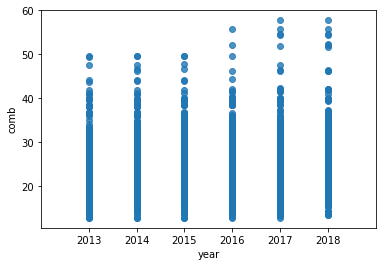

In [33]:
sns.regplot(data=fuel_econ, x='year', y='comb', fit_reg=False); # overfitting

ticks = [x for x in np.arange(2013, 2019, 1)]
plt.xticks(ticks, ticks)
plt.xlim(2012,2019);

In the above plot, we can infer some kind of positive relationship between the two variables, but the degree of variability in the data and strength of relationship are fairly unclear. 

In cases like this, we may want to employ **transparency** and **jitter** to make the scatterplot more informative. Transparency can be added to a scatter call by adding the **"alpha" parameter** set to a value between 0 (fully transparent, not visible) and 1 (fully opaque).

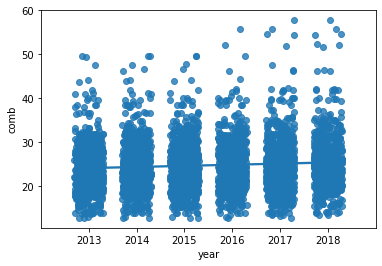

In [46]:
sns.regplot(data=fuel_econ, x='year', y='comb', 
            x_jitter=0.3)

ticks = [x for x in np.arange(2013, 2019, 1)]
plt.xticks(ticks, ticks)
plt.xlim(2012,2019);

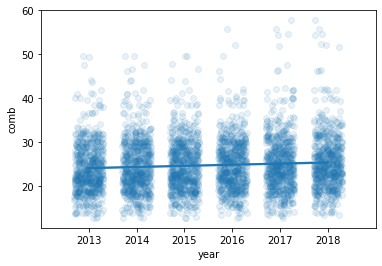

In [45]:
sns.regplot(data=fuel_econ, x='year', y='comb', 
            x_jitter=0.3, scatter_kws={'alpha':0.1}) # alpha parameter exists in matplotlib

ticks = [x for x in np.arange(2013, 2019, 1)]
plt.xticks(ticks, ticks)
plt.xlim(2012,2019);

Where more points overlap, the darker the image will be. Here, we can now see that there is a week positive relationship between the two numeric variables. 

As an alternative or companion to transparency, we can also add jitter to move the position of each point slightly from its true value. This is **not a direct option in matplotlib's scatter function**, but is a **built-in option with seaborn's regplot function.** x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made:

The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.

---
## Heat Map

Quantitative vs Quantitive variable
- Good for discrete vs discrete
- Good alternative to adding transparency for a lot of data
- Bin sizes are important! 

A heat map is a 2-d version of the histogram that can be used as an **alternative to a scatterplot.** 

Like a scatterplot, the values of the **two numeric variables** to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with **`Matplotlib's hist2d`** function.

Notice that since we have two variables, the **"bins" parameter** takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram. We add a **colorbar** function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

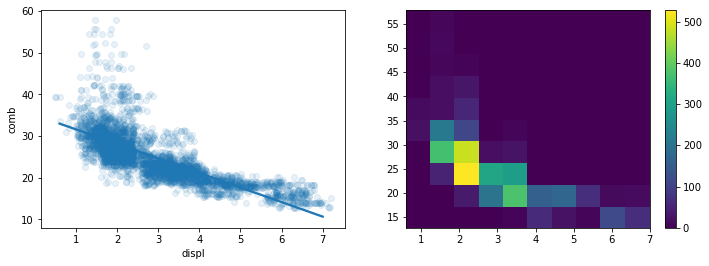

In [54]:
# relationship of displ and comb again
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
sns.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.4, scatter_kws={'alpha': 0.1});

plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb');
plt.colorbar();

As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.

Heatmaps can also be used as 2-d versions of bar charts, plotting counts on combinations of two categorical variables instead of numeric variables. <span style=color:red;>There is a function in **seaborn, heatmap**, that is **built for _`categorical`_ heatmaps**</span>. This will be discussed in more detail later in the lesson, in the section "Clustered Bar Charts".

### `Tips` Additional Variations
To select a different color palette, you can set the **"cmap" parameter** in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on **[this part](https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib)** of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of **reversing** the default "viridis" color palette, by setting cmap = 'viridis_r'.

Furthermore, I would like to **distinguish cells with zero counts** from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a **cmin = 0.5 parameter** to the hist2d call, this means that a cell will only get colored if it contains at least one point.

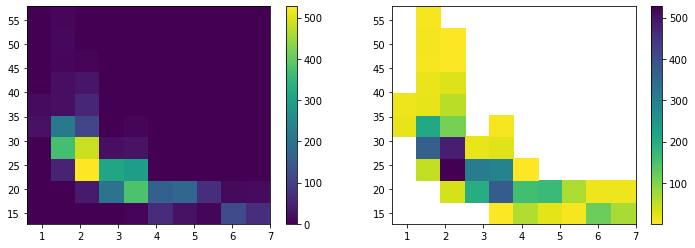

In [61]:
# relationship of displ and comb again
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist2d(data=fuel_econ, x='displ', y='comb');
plt.colorbar();

plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r');
plt.colorbar();

In [71]:
# setting a bin size with min and max values in mind
summary = fuel_econ[['displ', 'comb']].describe()
#print(summary)

min_max = summary.loc[['min','max'],['displ','comb']]
print(min_max)

displ_bin = np.arange(min_max.iloc[0,0], min_max.iloc[1,0]+0.3, 0.3) 
comb_bin = np.arange(min_max.iloc[1,0], min_max.iloc[1,1]+3, 3)

     displ     comb
min    0.6  12.8217
max    7.0  57.7824


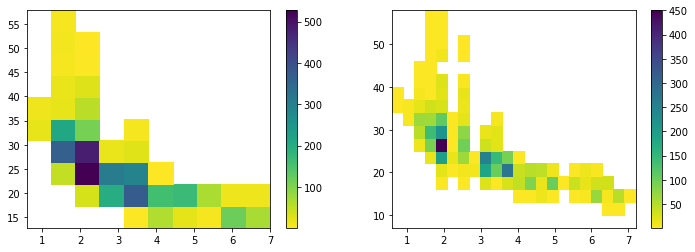

In [74]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r');
plt.colorbar();

plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r',
           bins=[displ_bin, comb_bin]);
plt.colorbar();

If you have a lot of data, you might want to **add annotations** to cells in the plot indicating the count of points in each cell. 

From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

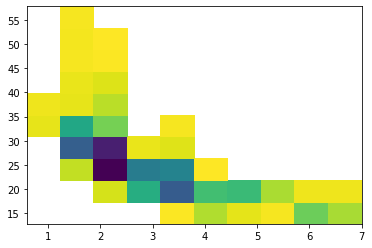

In [81]:
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r');

In [86]:
counts = h2d[0]
print(counts.shape)
print(counts)

(10, 10)
[[ nan  nan  nan  nan  21.  15.  nan  nan  nan  nan]
 [ nan  nan  50. 369. 214.  20.  19.   9.  11.   9.]
 [ nan  35. 527. 482. 111.  56.  29.   5.   1.  nan]
 [ nan 200. 309.  19.  nan  nan  nan  nan  nan  nan]
 [  5. 377. 291.  26.   8.  nan  nan  nan  nan  nan]
 [ 63. 160.   1.  nan  nan  nan  nan  nan  nan  nan]
 [ 23. 171.  nan  nan  nan  nan  nan  nan  nan  nan]
 [  8.  68.  nan  nan  nan  nan  nan  nan  nan  nan]
 [119.  14.  nan  nan  nan  nan  nan  nan  nan  nan]
 [ 69.  15.  nan  nan  nan  nan  nan  nan  nan  nan]]


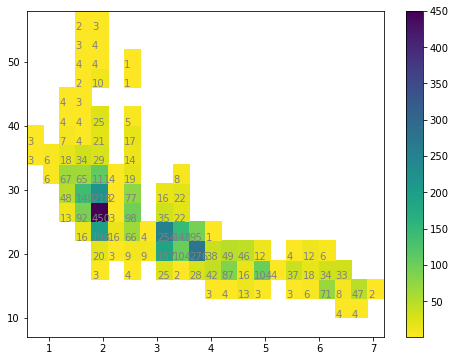

In [115]:
displ_bin = np.arange(min_max.iloc[0,0], min_max.iloc[1,0]+0.3, 0.3) 
comb_bin = np.arange(min_max.iloc[1,0], min_max.iloc[1,1]+3, 3)

plt.figure(figsize = [8,6])
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r',
                 bins=[displ_bin, comb_bin]);
plt.colorbar();

counts_matrix = h2d[0]

for i in range(counts_matrix.shape[0]):
    for j in range(counts_matrix.shape[1]):
        c = counts_matrix[i,j] 
        if c > 0: # to exclude NaN values
            plt.text(displ_bin[i], comb_bin[j]+0.1, int(c), ha='left', color='grey');

---

## `2` Quantitative vs Qulitative variable

## Violonplots

There are a few ways of plotting the relationship between `one quantitative` and `one qualitative variable`, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. 

For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

 <img src = 'https://video.udacity-data.com/topher/2018/March/5ab1a954_l4-c06-violinplot1/l4-c06-violinplot1.png'>

Here, you can see that the numeric data takes on a different shape in each categorical level: Some bimodality is suggested in group Alpha, a relatively high variance is observed in Beta, and Gamma and Delta are skewed negatively and positively, respectively. You can also see that each level has been rendered in a different color, like how the plain countplot was in the previous lesson. We can set the "color" parameter to make each curve the same color if it is not meaningful.

Inside each curve, there is a black shape with a white dot inside. This is the miniature box plot mentioned above. A further discussion of box plots will be performed on the next page. If you'd like to remove the box plot, you can set the `inner = None` parameter in the violinplot call to simplify the look of the final visualization.

### `Tips` Additional Variation
Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

<img src = 'https://video.udacity-data.com/topher/2018/March/5ab203d6_l4-c06-violinplot3/l4-c06-violinplot3.png'>

In [5]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')
#print(fuel_econ.info())
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [ ]:
# compare vclass vs comb

In [6]:
fuel_econ['VClass'].unique() #dtype=object, and we would like to make this ordinal categorical

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [31]:
order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclass_category = pd.CategoricalDtype(order, ordered=True)

In [10]:
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclass_category)
fuel_econ['VClass'].unique()

[Subcompact Cars, Compact Cars, Midsize Cars, Large Cars, Minicompact Cars]
Categories (5, object): [Minicompact Cars < Subcompact Cars < Compact Cars < Midsize Cars < Large Cars]

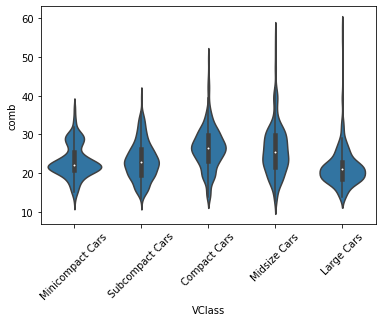

In [13]:
base_color = sns.color_palette()[0]
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', 
               color = base_color, inner = 'box');
plt.xticks(rotation=45);

## Boxplot
A box plot is another way of showing the **relationship between a numeric variable and a categorical variable.** Compared to the violin plot, the box plot leans more on **summarization** of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using `seaborn's boxplot` function.

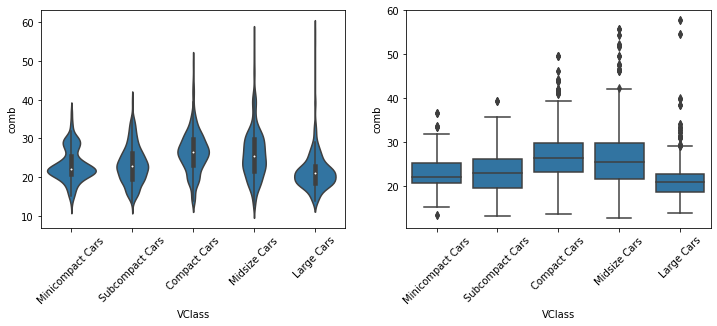

In [20]:
plt.figure(figsize = (12,4));
base_color = sns.color_palette()[0]

dataframe = fuel_econ
x_feature = 'VClass'
y_feature = 'comb'

plt.subplot(1,2,1)
sns.violinplot(data=dataframe, x=x_feature, y=y_feature, color=base_color, inner='box')
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.boxplot(data=dataframe, x=x_feature, y=y_feature, color=base_color)
plt.xticks(rotation=45);

Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot is assigned to a variable, ax1 is used to programmatically obtain those limit values.

### `Tips` Very useful information

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, **the height of the box is the interquartile range (IQR)**. 

From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a **maximum range is set on whisker length; by default this is 1.5 times the IQR.** For the Gamma level, there are points below the lower whisker that indicate individual **outlier** points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, 

the box plot is a cleaner **summary** of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. 

On the other hand, the box plot **lacks** as nuanced a depiction of **distributions** as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

### `Tips` Additional Variations
As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

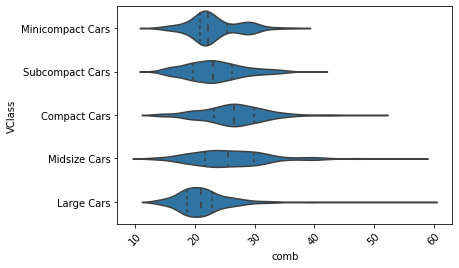

In [29]:
plt.figure(figsize = (6,4));
base_color = sns.color_palette()[0]

dataframe = fuel_econ
x_feature = 'VClass'
y_feature = 'comb'

sns.violinplot(data=dataframe, x=y_feature, y=x_feature, color=base_color, inner='quartile')
plt.xticks(rotation=45);

In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

---

## `3.` Qualitative vs Qualitative variable

## Clustered Bar Charts

To depict the relationship `between two categorical variables`, we can **extend the univariate bar chart** seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. 

In a clustered bar chart, bars are **organized into clusters based on levels of the first variable**, and **then bars are ordered _consistently_ across the second variable within each cluster**. This is easiest to see with an example, using `seaborn's countplot` function. To take the plot from univariate to bivariate, we **add the second variable** to be plotted under the `"hue" argument`:

In [32]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')

order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclass_category = pd.CategoricalDtype(order, ordered=True)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclass_category)
fuel_econ['VClass'].unique()

[Subcompact Cars, Compact Cars, Midsize Cars, Large Cars, Minicompact Cars]
Categories (5, object): [Minicompact Cars < Subcompact Cars < Compact Cars < Midsize Cars < Large Cars]

In [33]:
#print(fuel_econ.info())
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [34]:
# Compare VClass vs trans

In [44]:
#fuel_econ['trans'].unique() # going to simplify into Automatic and Manual
#fuel_econ['trans'].str.split().str[0]
fuel_econ['trans'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [52]:
# Modifying data for heatmap
count_vclass_trans = fuel_econ.groupby(['VClass','trans']).size()
count_vclass_trans = count_vclass_trans.reset_index(name='count')

In [54]:
count_vclass_trans = count_vclass_trans.pivot(index='VClass', columns='trans', values='count')

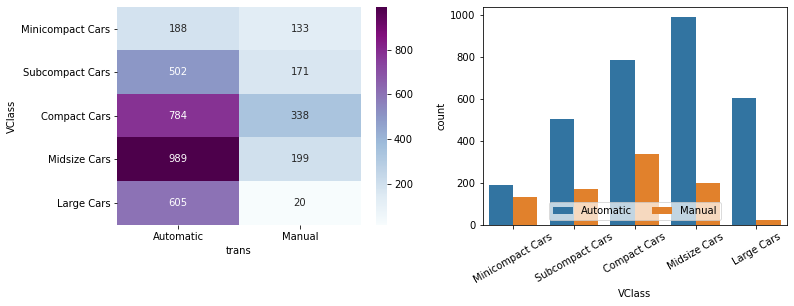

In [84]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(count_vclass_trans, annot = True, fmt = 'd', cmap = 'BuPu');

plt.subplot(1,2,2)
#base_color = sns.color_palette()[0]
sns.countplot(data = fuel_econ, x = 'VClass', hue = 'trans');
plt.xticks(rotation = 30);
plt.legend(loc = 'lower center', framealpha = 0.7, ncol = 3);

#### The heat map tells the same story as the clustered bar chart. Compared to the clustered bar chart, however, there is less precision interpreting the magnitude of differences. For this reason, we might want to add annotations to the plot to report counts within each cell.

annot = True makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding `fmt = 'd'` means that annotations will all be formatted as integers instead. You can use `fmt = '.0f'` if you have any cells with no counts, in order to account for NaNs.

**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) **Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

---

## `4.` Additional plot practices

## Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, **most often by different levels of a categorical variable.** For each of these subsets of the data, the same plot type is rendered on other variables. 

Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. **While faceting is most useful in `multivariate` visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.**

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for **subsets** of the data divided by categorical variable levels. `Seaborn's FacetGrid` class facilitates the creation of faceted plots. 

There are two steps involved in creating a faceted plot. 
First, we need to create an instance of the `FacetGrid` object and specify the feature we want to facet by.
Then we use the `map` method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset.

### `Tips` Additional Variation
If you have **many categorical levels** to plot, then you might want to add more arguments to the FacetGrid object initialization to facilitate clarity in conveyance of information. Setting **col_wrap = 5** means that the plots will be organized into rows of five facets each, rather than a single long row of fifteen plots.

### `Tips` Adaptation of univariate plots

Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, **indicating a `mean` or `other statistic` on a second variable.**

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's **`barplot`** function:

##### Side note: barplot / pointplot use rather than box plot or violin plot, with the height indicating statistics: useful to have statistics like mean when a second variable returns 0, 1 (binary)

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size. The Delta bar dips below the 0 axis due to the negative mean.

As an alternative, the **`pointplot`** function can be used to **plot the averages as points rather than bars.** This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.



## Line Plots
The line plot is a fairly common plot type that is used to plot the **trend of one numeric variable** against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, **only one point** is plotted for every unique x-value or bin of x-values (like a histogram). 

If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a `time series plot`. Often, we have only one observation per time period, like in stock or currency charts. While there is a **seaborn** function **`tsplot`** that is intended to be used with time series data, it is fairly specialized and (as of this writing's seaborn 0.8) is slated for major changes.

Instead, we will make use of **Matplotlib's** **`errorbar`** function, performing some processing on the data in order to get it into its necessary form.